In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import date
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('/Users/xiangliu/Desktop/CSC560 Data/pollution_us_2000_2016.csv')
data.shape

(1746661, 29)

In [3]:
data.head(3)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [4]:
le=data['CO AQI']
le[le.isnull()]

0         NaN
2         NaN
4         NaN
6         NaN
8         NaN
10        NaN
12        NaN
14        NaN
16        NaN
18        NaN
20        NaN
22        NaN
24        NaN
26        NaN
28        NaN
30        NaN
32        NaN
34        NaN
36        NaN
38        NaN
40        NaN
42        NaN
44        NaN
46        NaN
48        NaN
50        NaN
52        NaN
54        NaN
56        NaN
58        NaN
           ..
1746601   NaN
1746603   NaN
1746605   NaN
1746607   NaN
1746609   NaN
1746611   NaN
1746613   NaN
1746615   NaN
1746617   NaN
1746619   NaN
1746621   NaN
1746623   NaN
1746625   NaN
1746627   NaN
1746629   NaN
1746631   NaN
1746633   NaN
1746635   NaN
1746637   NaN
1746639   NaN
1746641   NaN
1746643   NaN
1746645   NaN
1746647   NaN
1746649   NaN
1746651   NaN
1746653   NaN
1746655   NaN
1746657   NaN
1746659   NaN
Name: CO AQI, Length: 873323, dtype: float64

In [5]:
##Look Into each value
data=data.dropna()
data.to_csv("/Users/xiangliu/Desktop/CSC560 Data/pollution_AQI.csv",index=True,sep=',')

In [6]:
data = pd.read_csv('/Users/xiangliu/Desktop/CSC560 Data/pollution_AQI.csv')
data.shape

(436876, 30)

In [7]:
data.head(3)

,Unnamed: 0,Unnamed: 0.1,State Code,County Code,Site Num,Address,State,County,City,Date Local,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
1,5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
2,9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0


In [8]:
data.groupby(['State']).count()
#Found there are 5 states no there(Montana, Nebraska, Mississippi, West virgina, Vermont)

,Unnamed: 0,Unnamed: 0.1,State Code,County Code,Site Num,Address,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,,,,,,
Alabama,782,782,782,782,782,782,782,782,782,782,...,782,782,782,782,782,782,782,782,782,782
Alaska,494,494,494,494,494,494,494,494,494,494,...,494,494,494,494,494,494,494,494,494,494
Arizona,17469,17469,17469,17469,17469,17469,17469,17469,17469,17469,...,17469,17469,17469,17469,17469,17469,17469,17469,17469,17469
Arkansas,8832,8832,8832,8832,8832,8832,8832,8832,8832,8832,...,8832,8832,8832,8832,8832,8832,8832,8832,8832,8832
California,144109,144109,144109,144109,144109,144109,144109,144109,144109,144109,...,144109,144109,144109,144109,144109,144109,144109,144109,144109,144109
Colorado,8801,8801,8801,8801,8801,8801,8801,8801,8801,8801,...,8801,8801,8801,8801,8801,8801,8801,8801,8801,8801
Connecticut,7483,7483,7483,7483,7483,7483,7483,7483,7483,7483,...,7483,7483,7483,7483,7483,7483,7483,7483,7483,7483
Country Of Mexico,2383,2383,2383,2383,2383,2383,2383,2383,2383,2383,...,2383,2383,2383,2383,2383,2383,2383,2383,2383,2383
Delaware,909,909,909,909,909,909,909,909,909,909,...,909,909,909,909,909,909,909,909,909,909


In [9]:
le=data['CO AQI']
le[le.isnull()]

Series([], Name: CO AQI, dtype: float64)

In [10]:
le=data['SO2 AQI']
le[le.isnull()]

Series([], Name: SO2 AQI, dtype: float64)

In [11]:
le=data['NO2 AQI']
le[le.isnull()]

Series([], Name: NO2 AQI, dtype: int64)

In [12]:
le=data['O3 AQI']
le[le.isnull()]

Series([], Name: O3 AQI, dtype: int64)

In [13]:
le=data['SO2 Mean']
le[le.isnull()]

Series([], Name: SO2 Mean, dtype: float64)

In [14]:
le=data['CO Mean']
le[le.isnull()]

Series([], Name: CO Mean, dtype: float64)

In [15]:
le=data['NO2 Mean']
le[le.isnull()]

Series([], Name: NO2 Mean, dtype: float64)

In [16]:
le=data['O3 Mean']
le[le.isnull()]

Series([], Name: O3 Mean, dtype: float64)

In [17]:
data.head(3)

,Unnamed: 0,Unnamed: 0.1,State Code,County Code,Site Num,Address,State,County,City,Date Local,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
1,5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,1.066667,2.3,0,26.0
2,9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.762500,2.5,8,28.0


In [18]:
data['SO2 Mean'].mean()

1.8816793440861934

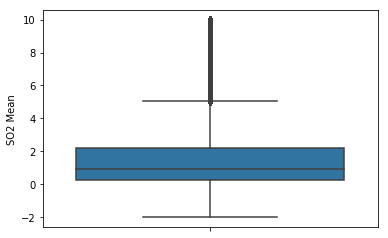

In [19]:
sns.boxplot(y='SO2 Mean', data=data.loc[(data['SO2 Mean'] < 10)])

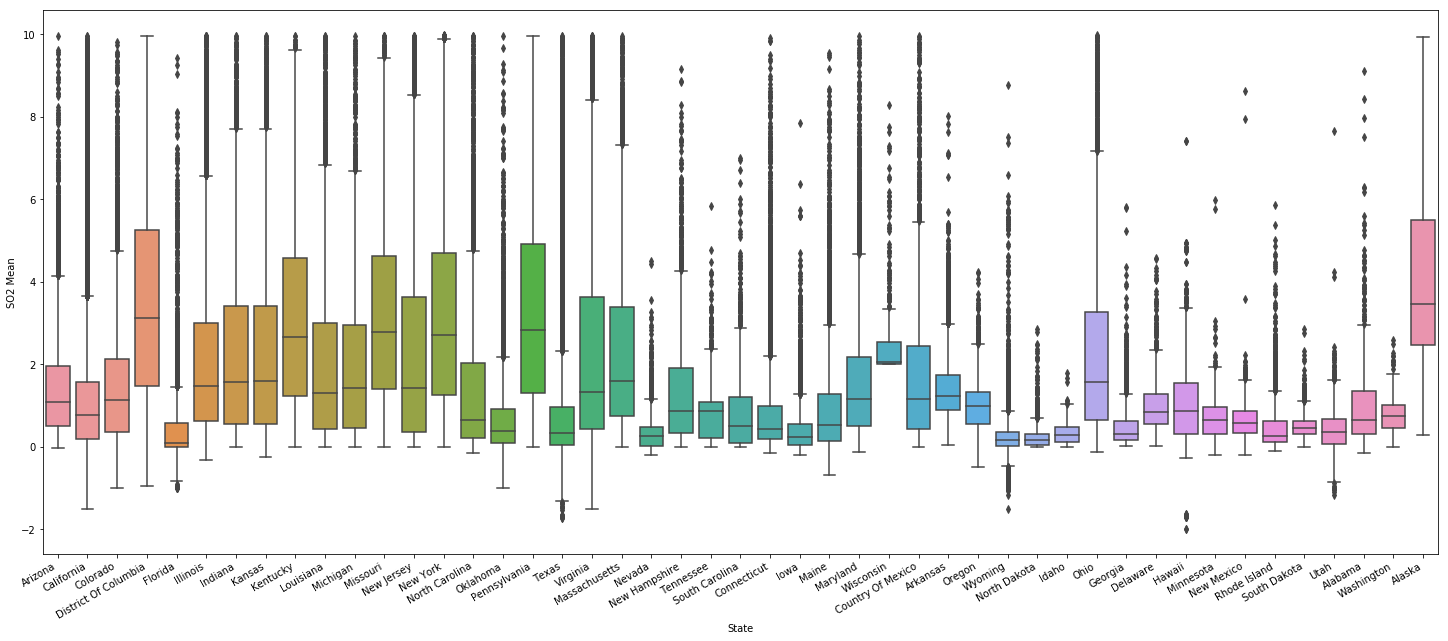

In [20]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x='State', y='SO2 Mean', data=data.loc[(data['SO2 Mean'] < 10)])
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show();

In [21]:
data['CO Mean'].mean()

0.369722897517831

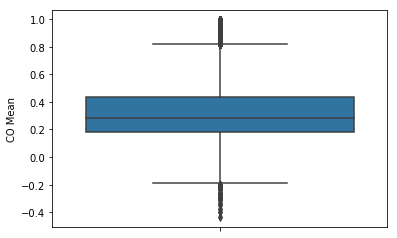

In [22]:
sns.boxplot(y='CO Mean', data=data.loc[(data['CO Mean'] < 1)])

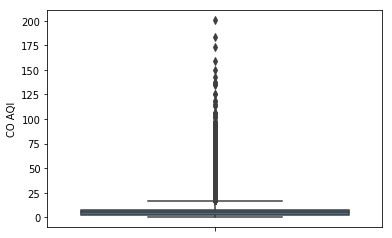

In [23]:
sns.boxplot(y='CO AQI', data=data)

In [24]:
data['CO AQI'].max()

201.0

In [25]:
county=data.loc[(data['CO AQI'] > 100) & (data['CO AQI'] < 300)]
county.groupby(['State']).count()

,Unnamed: 0,Unnamed: 0.1,State Code,County Code,Site Num,Address,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
State,,,,,,,,,,,,,,,,,,,,,
California,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
Country Of Mexico,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [26]:
county.groupby(['County']).head(20)

,Unnamed: 0,Unnamed: 0.1,State Code,County Code,Site Num,Address,State,County,City,Date Local,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
2334,9333,9333,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-01-09,...,Parts per billion,5.000000,13.0,1,19.0,Parts per million,4.995833,11.0,1,126.0
2340,9357,9357,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-01-15,...,Parts per billion,6.304348,11.0,1,16.0,Parts per million,5.633333,9.6,7,103.0
2598,10389,10389,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-11-21,...,Parts per billion,8.260870,24.0,19,34.0,Parts per million,3.358333,11.6,23,136.0
2599,10393,10393,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-11-22,...,Parts per billion,5.363636,16.0,2,23.0,Parts per million,5.029167,13.0,2,159.0
2603,10409,10409,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-11-26,...,Parts per billion,4.608696,16.0,0,23.0,Parts per million,5.195833,14.4,4,183.0
2627,10505,10505,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-12-20,...,Parts per billion,9.608696,25.0,1,36.0,Parts per million,7.508333,15.5,6,201.0
2628,10509,10509,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2000-12-21,...,Parts per billion,10.000000,21.0,8,30.0,Parts per million,6.975000,13.8,7,173.0
25573,102253,10607,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2001-10-15,...,Parts per billion,0.847826,2.1,3,3.0,Parts per million,4.958333,9.8,4,106.0
25578,102273,10627,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2001-10-20,...,Parts per billion,1.273913,2.6,1,3.0,Parts per million,4.500000,10.5,4,118.0
25632,102489,10843,6,25,5,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",California,Imperial,Calexico,2001-12-13,...,Parts per billion,1.060870,2.2,23,3.0,Parts per million,4.558333,9.8,2,106.0


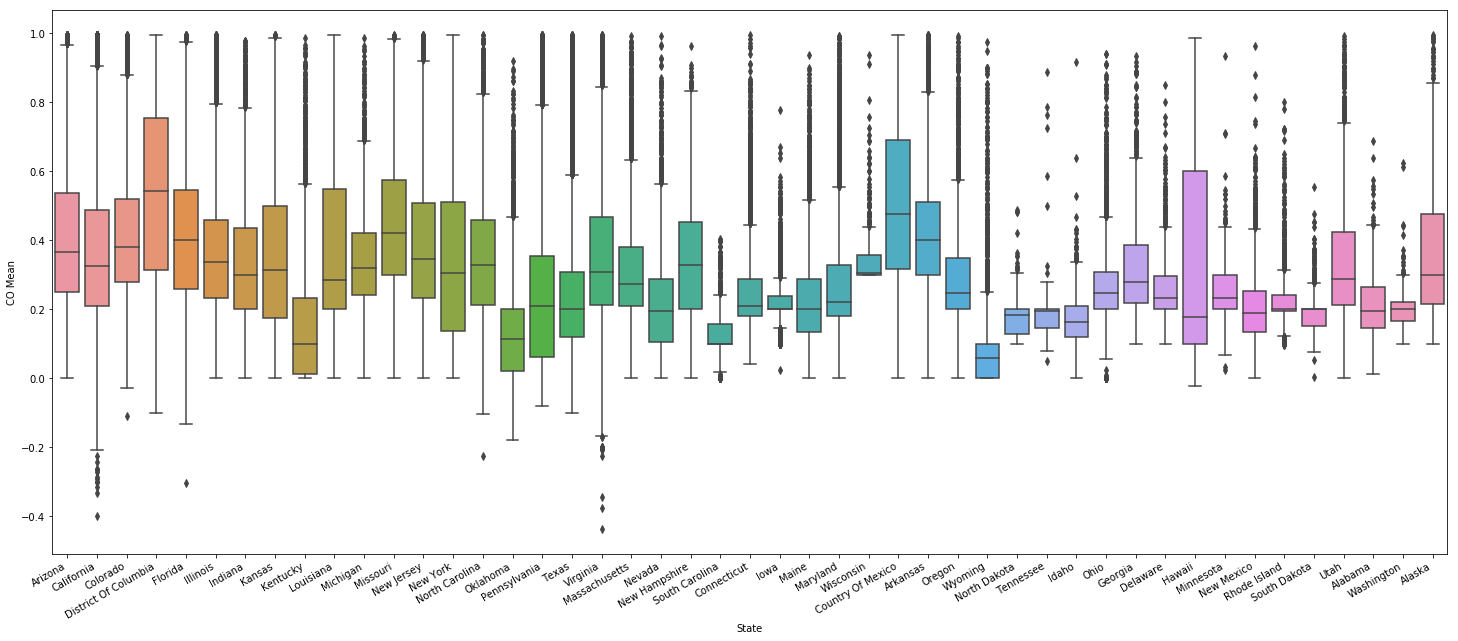

In [27]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x='State', y='CO Mean', data=data.loc[(data['CO Mean'] < 1)])
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show();

In [28]:
data['NO2 Mean'].mean()

12.822497589812667

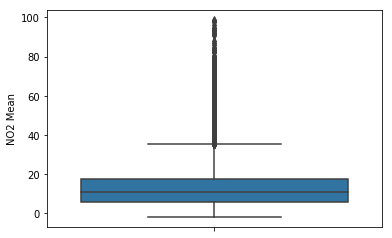

In [29]:
sns.boxplot(y='NO2 Mean', data=data.loc[(data['NO2 Mean'] < 100)])

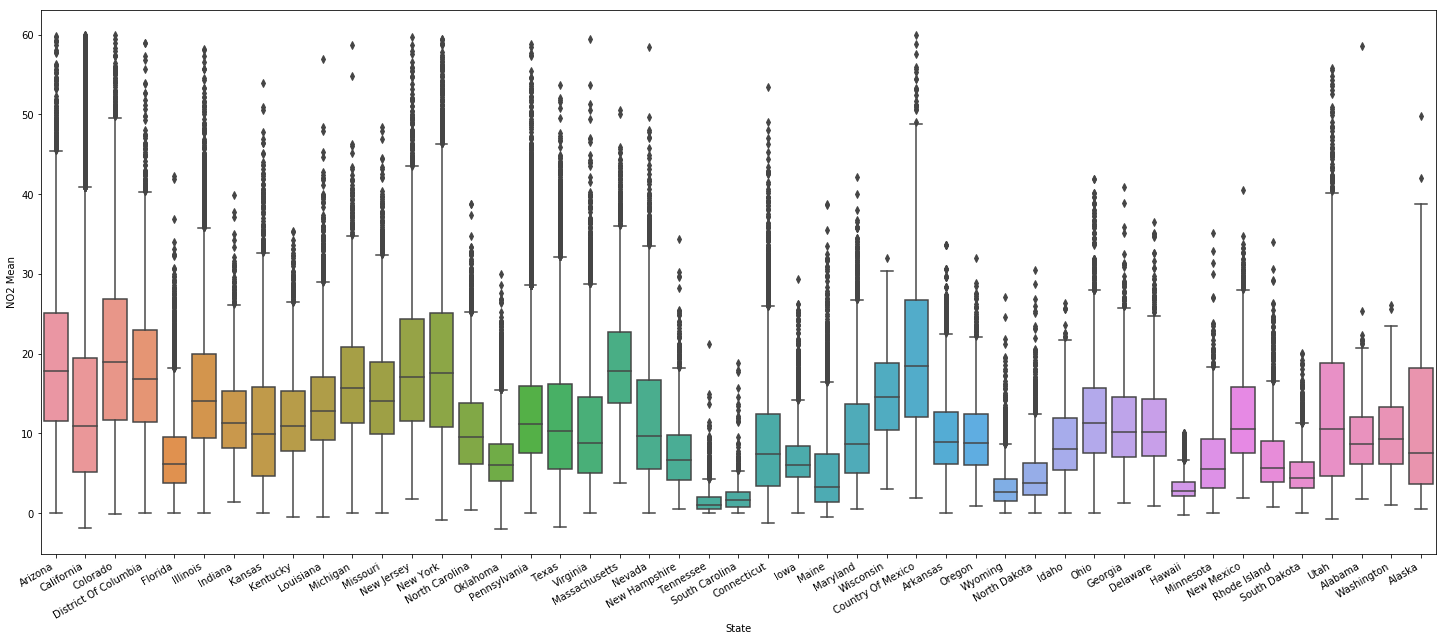

In [30]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(x='State', y='NO2 Mean', data=data.loc[(data['NO2 Mean'] < 60)])
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.show();

In [31]:
data['O3 Mean'].mean()

0.026123974986037225

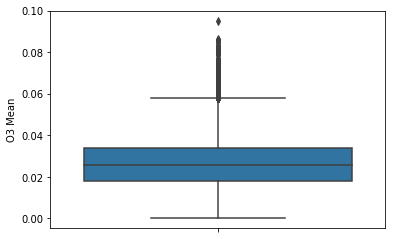

In [32]:
sns.boxplot(y='O3 Mean', data=data.loc[(data['O3 Mean'] <1)])

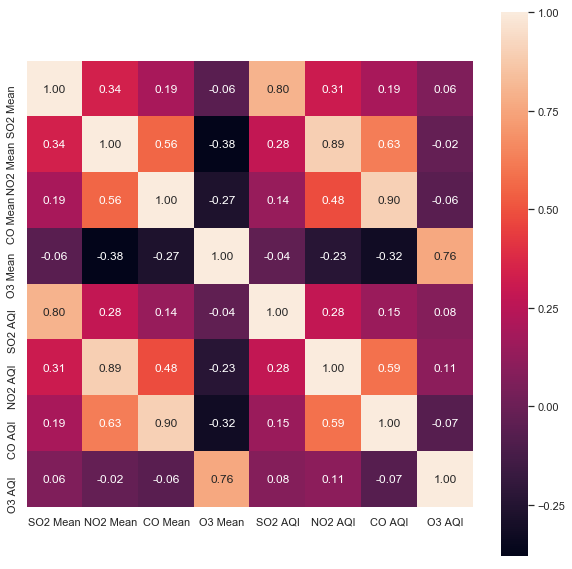

In [33]:
###Correlation Coefficient
col = ['SO2 Mean',
       'NO2 Mean',
       'CO Mean',
       'O3 Mean',
       'SO2 AQI',
       'NO2 AQI',
       'CO AQI',
       'O3 AQI'
       ]
corr = data.loc[(data['SO2 Mean'] <10)&(data['CO Mean'] <1)&(data['NO2 Mean'] <40)&(data['O3 Mean'] <0.08)][col].dropna().corr()
plt.figure(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [34]:
# scatter = data.loc[(data['SO2 Mean'] <50)&(data['CO Mean'] <10)&(data['NO2 Mean'] <100)&(data['O3 Mean'] <1)][col]
# scatter_matrix(scatter, figsize =(20,20), color='lightblue')

In [35]:
#data.groupby(['State']).sort_values("SO2_Mean").plot.bar()
#sns.barplot(x='State', y="SO2_Mean", data=data)

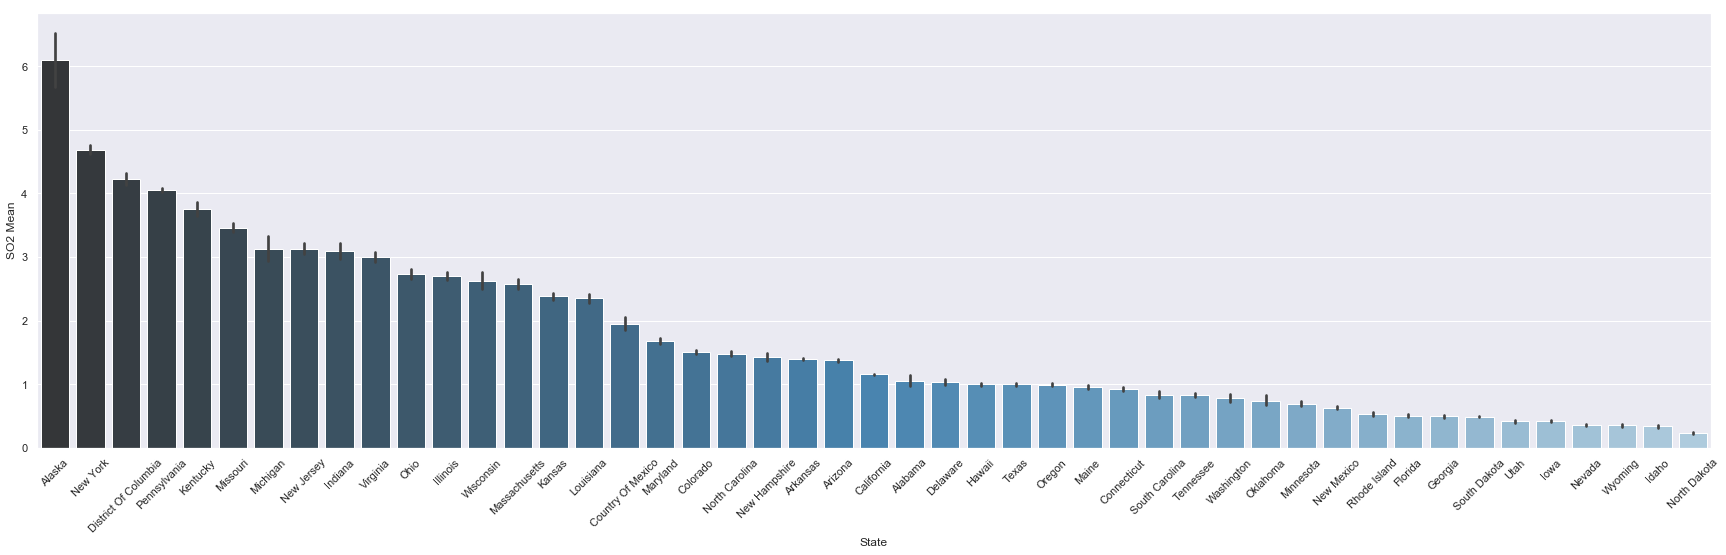

In [42]:
sns.set(font_scale=1)
sort = data.loc[(data['SO2 Mean'] <50)]\
                    .groupby('State')['SO2 Mean']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .index

sns.barplot(y='SO2 Mean', x='State', data=data, order=sort, palette="Blues_d")
sns.set_context({"figure.figsize": (30, 8)})
plt.xticks(rotation=45)
plt.show()

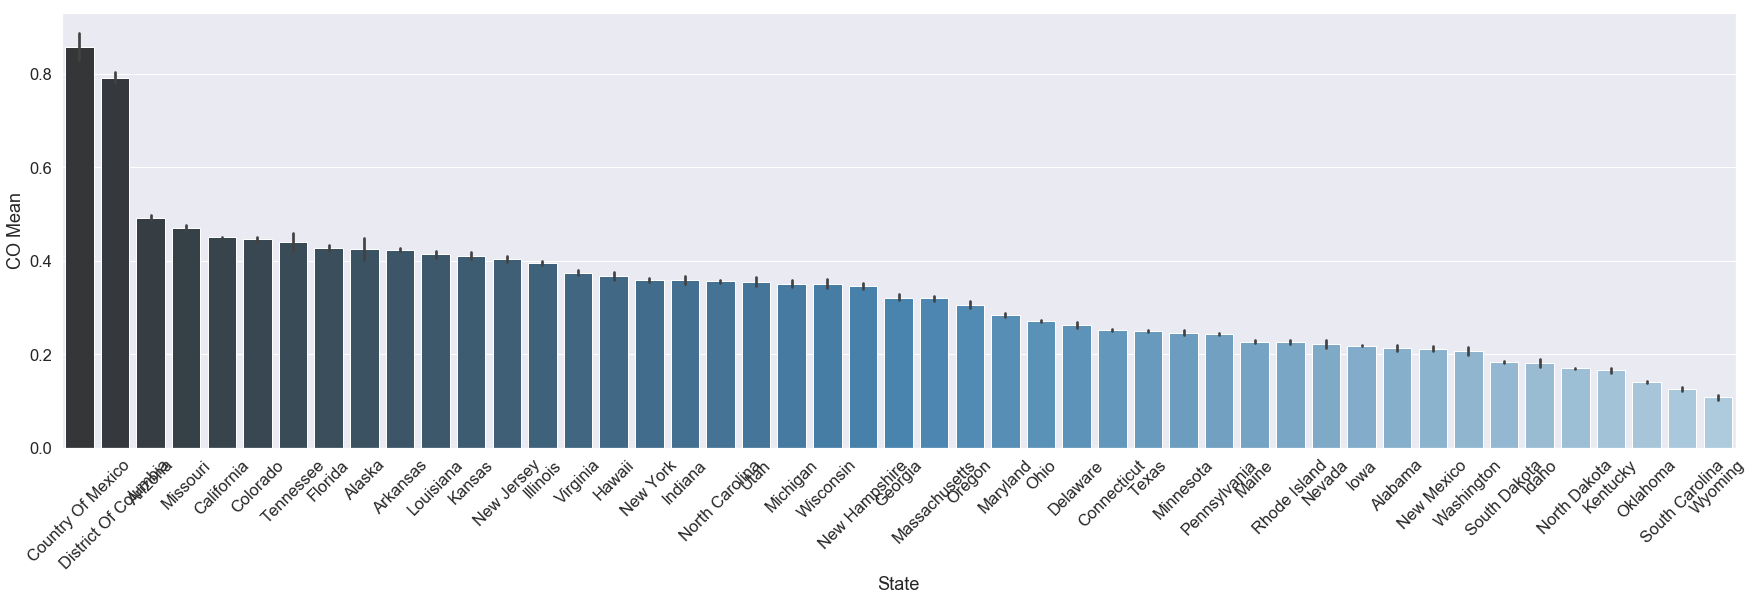

In [37]:
sns.set(font_scale=1.5)
sort = data.loc[(data['CO Mean'] <10)]\
                    .groupby('State')['CO Mean']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .index

sns.barplot(y='CO Mean', x='State', data=data, order=sort, palette="Blues_d")
sns.set_context({"figure.figsize": (30, 8)})
plt.xticks(rotation=45)
plt.show()

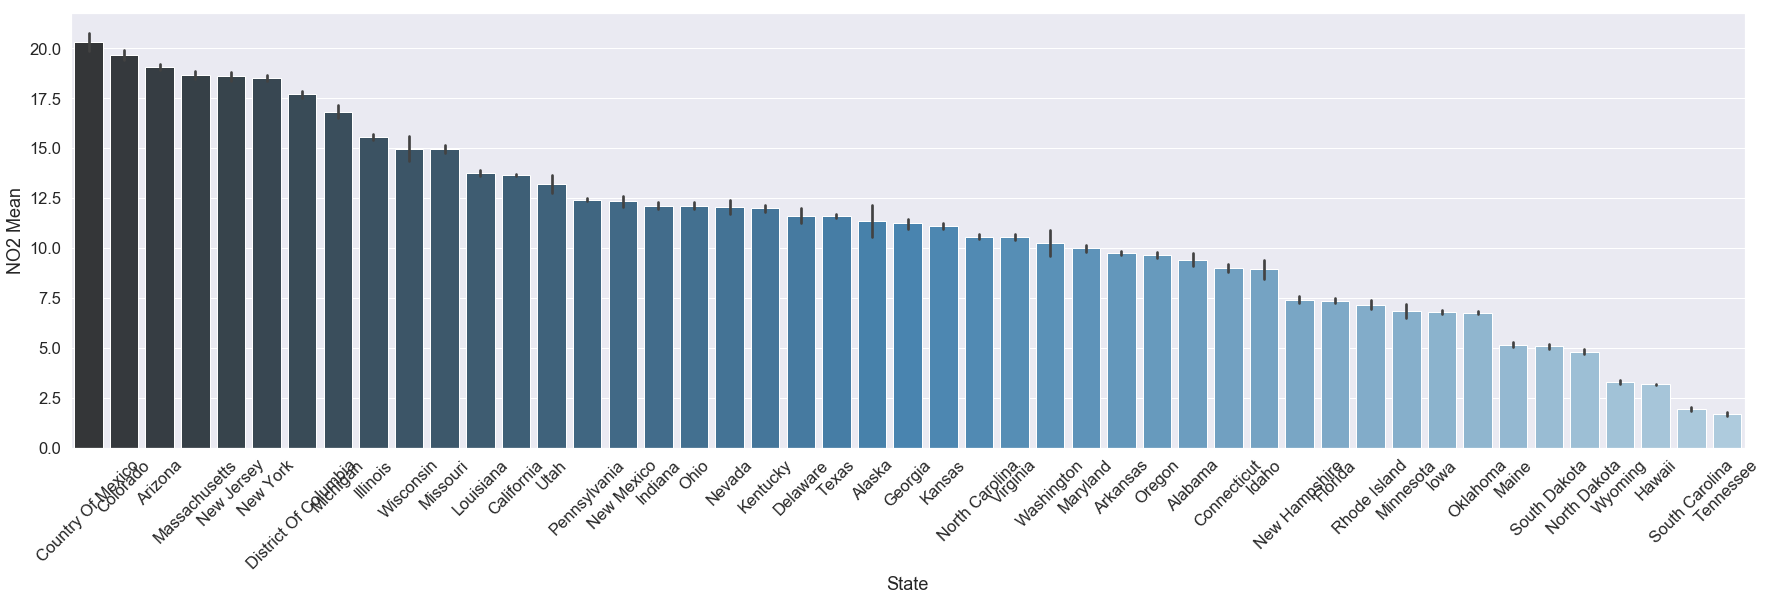

In [38]:
sns.set(font_scale=1.5)
sort = data.loc[(data['NO2 Mean'] <50)]\
                    .groupby('State')['NO2 Mean']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .index

sns.barplot(y='NO2 Mean', x='State', data=data, order=sort, palette="Blues_d")
sns.set_context({"figure.figsize": (30, 8)})
plt.xticks(rotation=45)
plt.show()

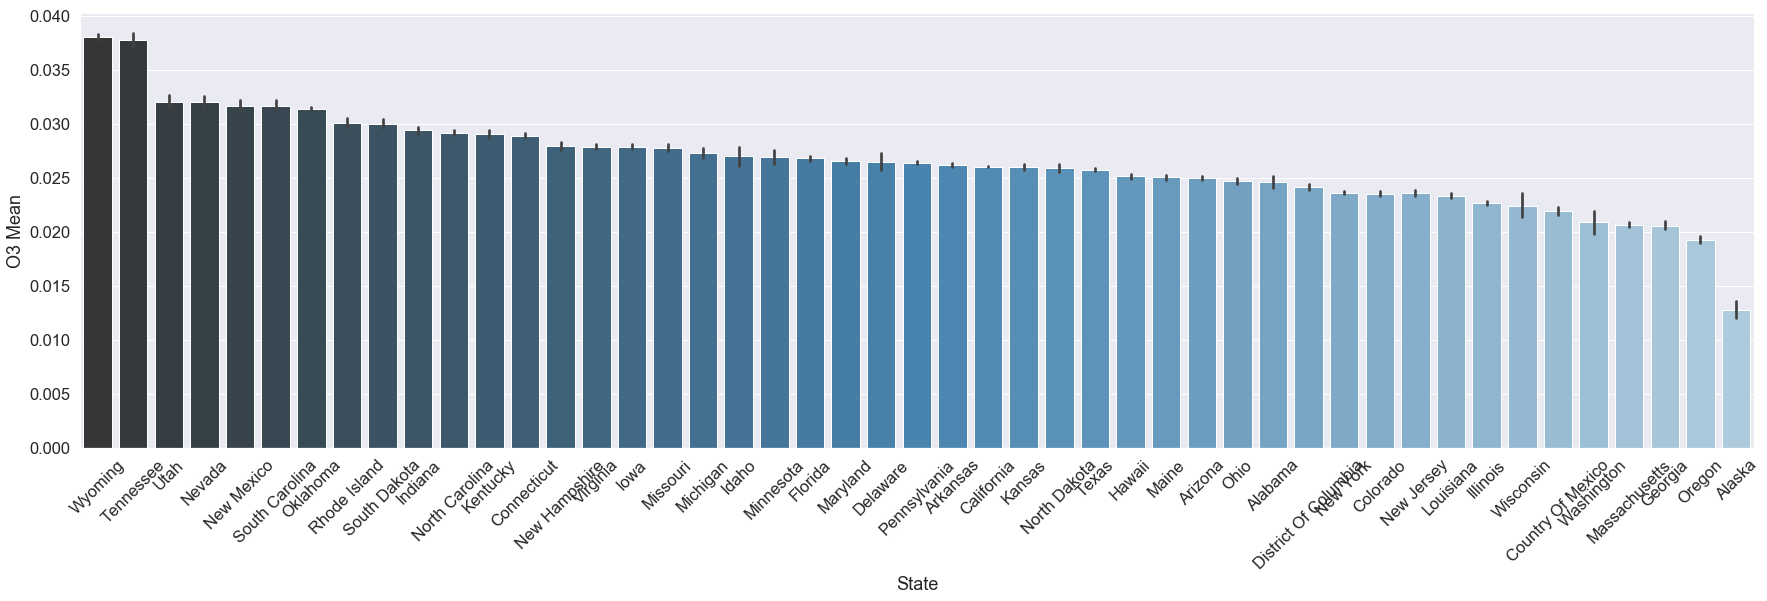

In [39]:
sns.set(font_scale=1.5)
sort = data.loc[(data['O3 Mean'] <0.08)]\
                    .groupby('State')['O3 Mean']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .index

sns.barplot(y='O3 Mean', x='State', data=data, order=sort, palette="Blues_d")
sns.set_context({"figure.figsize": (30, 8)})
plt.xticks(rotation=45)
plt.show()

In [40]:
#Build training model
# scatter = data.loc[(data['SO2 Mean'] <50)&(data['CO Mean'] <10)&(data['NO2 Mean'] <100)&(data['O3 Mean'] <1)][col]
# scatter_matrix(scatter, figsize =(20,20), color='lightblue')